In [42]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from glob import glob
from PIL import Image

In [43]:
kid1=[]
kid2=[]
kid3=[]
kid4=[]
kid5=[]
kid6=[]
kid7=[]
kid8=[]
kid9=[]
kid10=[]
kid11=[]
kid12=[]
kid13=[]
kid14=[]

for i in range(1,22):
    df1=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7554/SimpleTest/'+str(i)+'.csv')
    df2=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7556/SimpleTest/'+str(i)+'.csv')
    df3=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7557/SimpleTest/'+str(i)+'.csv')
    df4=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7558/SimpleTest/'+str(i)+'.csv')
    df5=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7559/SimpleTest/'+str(i)+'.csv')
    df6=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7560/SimpleTest/'+str(i)+'.csv')
    df7=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7561/SimpleTest/'+str(i)+'.csv')
    df8=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7563/SimpleTest/'+str(i)+'.csv')
    df9=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7569/SimpleTest/'+str(i)+'.csv')
    df10=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7570/SimpleTest/'+str(i)+'.csv')
    df11=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7571/SimpleTest/'+str(i)+'.csv')
    df12=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7572/SimpleTest/'+str(i)+'.csv')
    df13=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7573/SimpleTest/'+str(i)+'.csv')
    df14=pd.read_csv(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7574/SimpleTest/'+str(i)+'.csv')
    
    kid1.append(df1)
    kid2.append(df2)
    kid3.append(df3)
    kid4.append(df4)
    kid5.append(df5)
    kid6.append(df6)
    kid7.append(df7)
    kid8.append(df8)
    kid9.append(df9)
    kid10.append(df10)
    kid11.append(df11)
    kid12.append(df12)
    kid13.append(df13)
    kid14.append(df14)

kids = {
    "kid1": kid1,
    "kid2": kid2,
    "kid3": kid3,
    "kid4": kid4,
    "kid5": kid5,
    "kid6": kid6,
    "kid7": kid7,
    "kid8": kid8,
    "kid9": kid9,
    "kid10": kid10,
    "kid11": kid11,
    "kid12": kid12,
    "kid13": kid13,
    "kid14": kid14,
}

In [47]:
kids

{'kid1': [              X           Y  Pressure   TiltX   TiltY           Time
  0    925.902760  665.541979  0.045884 -4917.0   669.0  00:12.6099853
  1    925.902760  665.541979  0.045884 -4917.0   669.0  00:12.6256038
  2    926.692690  665.647303  0.082506 -4917.0   669.0  00:12.6445684
  3    927.008662  665.647303  0.115953 -4917.0   669.0  00:12.6602735
  4    927.324633  665.594641  0.140368 -4917.0   669.0  00:12.6838147
  ..          ...         ...       ...     ...     ...            ...
  127  585.495785  647.004966  0.378408 -4510.0  1946.0  00:14.0316787
  128  584.863841  646.846980  0.382803 -4510.0  1946.0  00:14.0472865
  129  584.863841  646.846980  0.386954 -4510.0  1946.0  00:14.0629098
  130  584.653193  646.741656  0.386954 -4501.0  1991.0  00:14.0785335
  131  584.653193  646.741656  0.389151 -4501.0  1991.0  00:14.0941464
  
  [132 rows x 6 columns],
                                                      X           Y   Pressure  \
  0                          

In [48]:
#type drawing-1
df=kids['kid6'][9]
df

,X,Y,Pressure,TiltX,TiltY,Time
0,626.5725,434.086667,0.406494,11992.0,7647.0,00:13.9212915
1,624.15,434.973333,0.450928,11992.0,7647.0,00:13.9290039
2,624.0075,434.973333,0.509521,11992.0,7647.0,00:13.9290039
3,624.0075,434.973333,0.529541,11992.0,7647.0,00:13.9430709
4,624.0075,434.973333,0.577637,11992.0,7647.0,00:13.9588913
...,...,...,...,...,...,...
383,652.08,575.446667,0.790527,9582.0,6923.0,00:22.9284160
384,652.08,575.446667,0.759277,9582.0,6923.0,00:22.9356765
385,651.795,575.446667,0.717285,9566.0,6973.0,00:22.9436196
386,Time Elapsed till drawing started: 00:02.2338841,NaN,NaN,NaN,NaN,NaN


In [49]:
df.rename(columns={' X':'X',' Y':'Y',' Pressure':'Pressure',' TiltX':'TiltX',' TiltY':'TiltY',' Time':'Time'},inplace=True)
df.dropna(inplace=True)
df['X']=df['X'].astype(float)

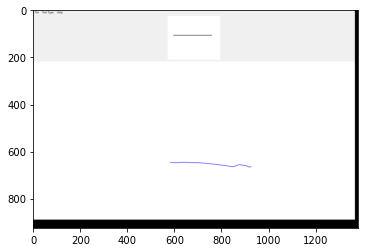

In [50]:
img = Image.open(r'C:\Users\ASUS\Desktop\עבודת גמר\train\7554\SimpleTest\1.png')
plt.imshow(img)

In [51]:
df['Time'].info

<bound method Series.info of 0      00:13.9212915
1      00:13.9290039
2      00:13.9290039
3      00:13.9430709
4      00:13.9588913
           ...      
381    00:22.9125151
382    00:22.9135134
383    00:22.9284160
384    00:22.9356765
385    00:22.9436196
Name: Time, Length: 386, dtype: object>

In [52]:
df['Time']=df['Time'].apply(lambda x:float(x.split(':')[1])+float(x.split(':')[0])*60 if(True) else 0)
df['Time']

0      13.921292
1      13.929004
2      13.929004
3      13.943071
4      13.958891
         ...    
381    22.912515
382    22.913513
383    22.928416
384    22.935676
385    22.943620
Name: Time, Length: 386, dtype: float64

In [53]:
def raise_hand(x,y):
    count=0
    for (colname,colval) in x.iteritems():
        if(colname=='Time'):
            for i in range(1,y):
                if(colval.values[i]>=colval.values[i-1]+0.1):
                    count=count+1
            
    return count
    

In [54]:
hands_raised=raise_hand(df,len(df['Time']))
hands_raised

5